In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/sarah/ML/master_thesis/Datasets/shuffled_data.csv")# Load mapping and clinical data
id_map = pd.read_csv("/Users/sarah/ML/master_thesis/Datasets/patient_id_mapping.csv")
id_map.columns = ['Anon.Patient_ID', 'study_id']
clinical = pd.read_excel("/Users/sarah/Library/Mobile Documents/iCloud~md~obsidian/Documents/MSc Medizininformatik/Master Thesis/Data/219 patients.xlsx")

# Merge measurement data with mapping
df_with_id = df.merge(id_map, on="Anon.Patient_ID", how="left")

# Merge with clinical data
df_full = df_with_id.merge(clinical, left_on="study_id", right_on="study_id", how="left")

In [2]:
output_folder = "/Users/sarah/Library/Mobile Documents/iCloud~md~obsidian/Documents/MSc Medizininformatik/Master Thesis/Writing/Plots"


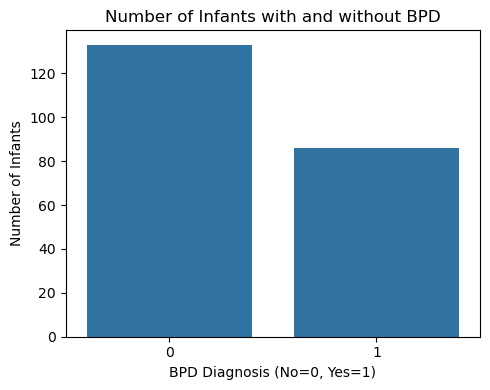

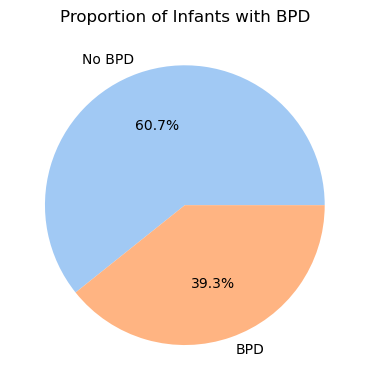

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count BPD yes/no
bpd_counts = df_full.drop_duplicates("Anon.Patient_ID")["BPD_yn"].value_counts().sort_index()

plt.figure(figsize=(5,4))
sns.barplot(x=bpd_counts.index, y=bpd_counts.values)
plt.title("Number of Infants with and without BPD")
plt.xlabel("BPD Diagnosis (No=0, Yes=1)")
plt.ylabel("Number of Infants")
plt.tight_layout()
plt.savefig(f"{output_folder}/bpd_diagnosis_count.png", dpi=300)
plt.show()

# Proportion Pie Chart
bpd_labels = ["No BPD", "BPD"]
plt.figure(figsize=(4,4))
plt.pie(bpd_counts.values, labels=bpd_labels, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Proportion of Infants with BPD")
plt.tight_layout()
plt.savefig(f"{output_folder}/bpd_diagnosis_proportion.png", dpi=300)
plt.show()


/var/folders/1h/20qwddgj29lghmzyjxl8m6k80000gn/T/ipykernel_2695/2529474988.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=bpd_counts.index, y=bpd_counts.values, palette="pastel")


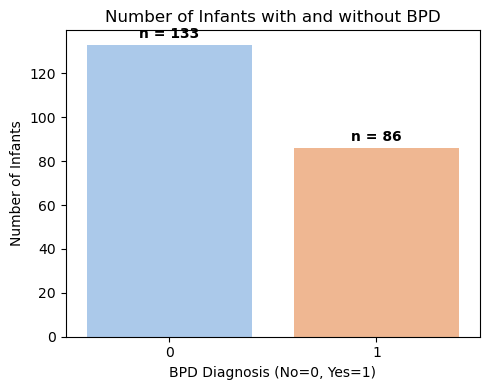

In [4]:
plt.figure(figsize=(5,4))
ax = sns.barplot(x=bpd_counts.index, y=bpd_counts.values, palette="pastel")
plt.title("Number of Infants with and without BPD")
plt.xlabel("BPD Diagnosis (No=0, Yes=1)")
plt.ylabel("Number of Infants")

# Add n= labels above each bar
for i, v in enumerate(bpd_counts.values):
    plt.text(i, v + 2, f"n = {v}", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig(f"{output_folder}/bpd_diagnosis_count.png", dpi=300)
plt.show()


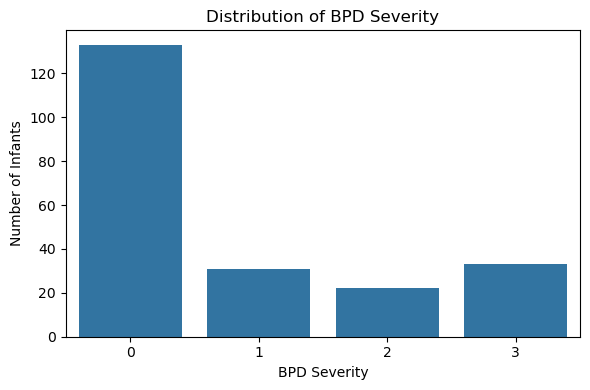

In [5]:
# BPD severity: should be categorical (e.g. "None", "Mild", "Moderate", "Severe")
severity_counts = df_full.drop_duplicates("Anon.Patient_ID")["BPD_severity"].value_counts().sort_index()

plt.figure(figsize=(6,4))
sns.barplot(x=severity_counts.index, y=severity_counts.values)
plt.title("Distribution of BPD Severity")
plt.xlabel("BPD Severity")
plt.ylabel("Number of Infants")
plt.tight_layout()
plt.savefig(f"{output_folder}/bpd_severity_distribution.png", dpi=300)
plt.show()


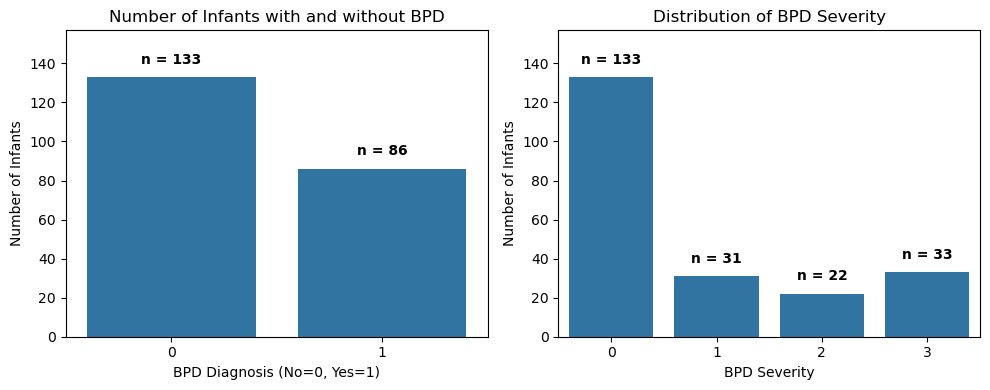

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

bpd_counts = df_full.drop_duplicates("Anon.Patient_ID")["BPD_yn"].value_counts().sort_index()
severity_counts = df_full.drop_duplicates("Anon.Patient_ID")["BPD_severity"].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot 1: BPD diagnosis
sns.barplot(x=bpd_counts.index, y=bpd_counts.values,  ax=axes[0])
axes[0].set_title("Number of Infants with and without BPD")
axes[0].set_xlabel("BPD Diagnosis (No=0, Yes=1)")
axes[0].set_ylabel("Number of Infants")
# Increase ylim to add space for label
axes[0].set_ylim(0, max(bpd_counts.values)*1.18)
for i, v in enumerate(bpd_counts.values):
    axes[0].text(i, v + max(bpd_counts.values)*0.04, f"n = {v}", ha='center', va='bottom', fontweight='bold')

# Plot 2: BPD severity
sns.barplot(x=severity_counts.index, y=severity_counts.values,ax=axes[1])
axes[1].set_title("Distribution of BPD Severity")
axes[1].set_xlabel("BPD Severity")
axes[1].set_ylabel("Number of Infants")
axes[1].set_ylim(0, max(severity_counts.values)*1.18) 
for i, v in enumerate(severity_counts.values):
    axes[1].text(i, v + max(severity_counts.values)*0.04, f"n = {v}", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig(f"{output_folder}/bpd_overview_side_by_side.png", dpi=300)
plt.show()


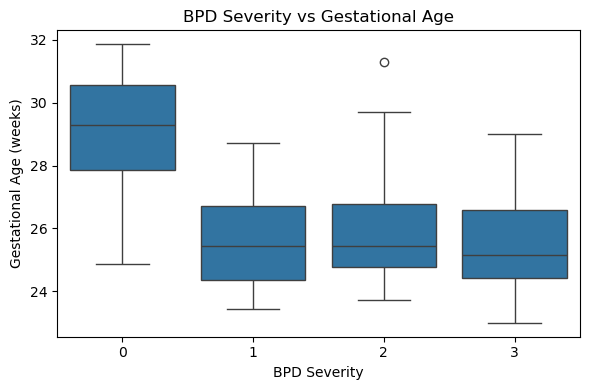

In [8]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_full.drop_duplicates("Anon.Patient_ID"), x='BPD_severity', y='GA_wd')
plt.title("BPD Severity vs Gestational Age")
plt.xlabel("BPD Severity")
plt.ylabel("Gestational Age (weeks)")
plt.tight_layout()
plt.savefig(f"{output_folder}/bpd_severity_vs_ga.png", dpi=300)
plt.show()


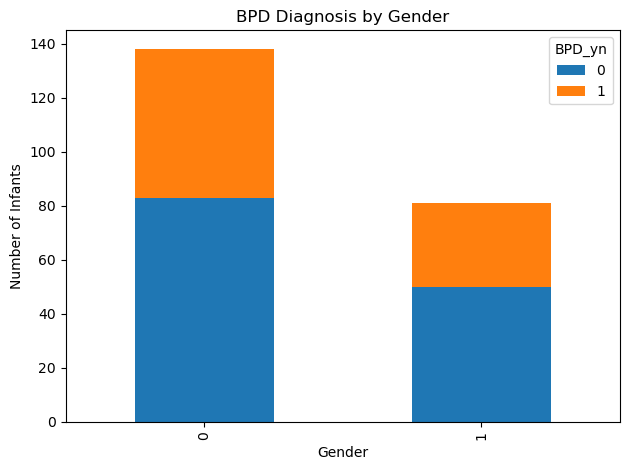

In [9]:
gender_bpd = df_full.drop_duplicates("Anon.Patient_ID").groupby(['sex', 'BPD_yn']).size().unstack()
gender_bpd.plot(kind='bar', stacked=True)
plt.title("BPD Diagnosis by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Infants")
plt.tight_layout()
plt.savefig(f"{output_folder}/bpd_by_gender.png", dpi=300)
plt.show()


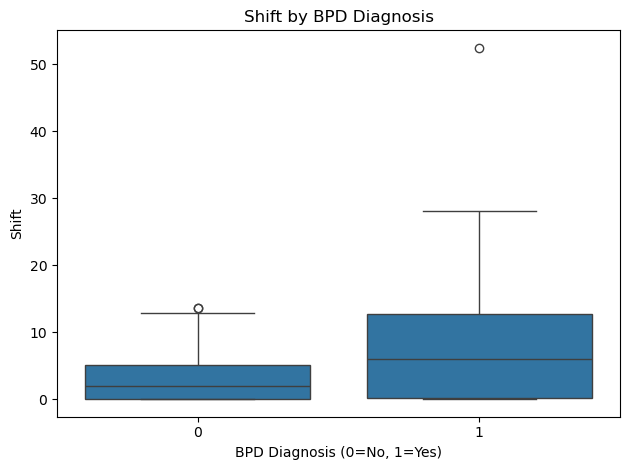

In [12]:
sns.boxplot(data=df_full.drop_duplicates("Anon.Patient_ID"), x='BPD_yn', y='shunt_2C')
plt.title("Shift by BPD Diagnosis")
plt.xlabel("BPD Diagnosis (0=No, 1=Yes)")
plt.ylabel("Shift")
plt.tight_layout()
plt.savefig(f"{output_folder}/shift_by_bpd_diagnosis.png", dpi=300)


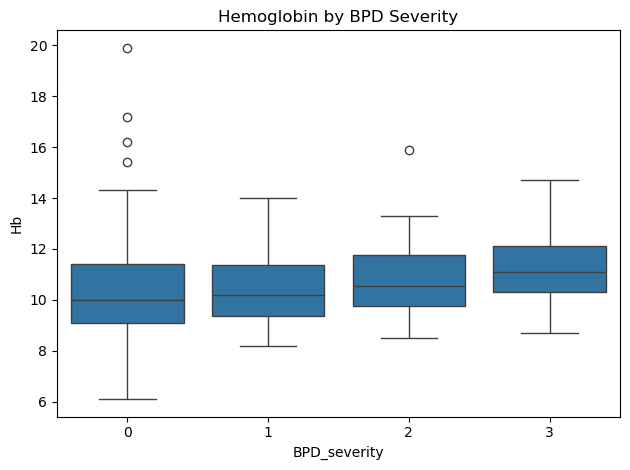

In [13]:
sns.boxplot(data=df_full.drop_duplicates("Anon.Patient_ID"), x='BPD_severity', y='Hb')
plt.title("Hemoglobin by BPD Severity")
plt.tight_layout()
plt.savefig(f"{output_folder}/hb_by_bpd_severity.png", dpi=300)
